In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Student_Performance.csv')

In [6]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
df['Extra_encoded']=df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [8]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra_encoded
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


In [9]:
df.drop(columns='Extracurricular Activities')

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra_encoded
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


In [10]:
train_data = df.values
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra_encoded
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,1
9996,7,64,Yes,8,5,58.0,1
9997,6,83,Yes,8,5,74.0,1
9998,9,97,Yes,7,0,95.0,1


In [11]:
y = train_data[:,-2].reshape(train_data.shape[0],1)
x = df.iloc[:, [0, 1,3,4,6]]
y

array([[91.0],
       [65.0],
       [45.0],
       ...,
       [74.0],
       [95.0],
       [64.0]], dtype=object)

In [14]:
x = np.vstack((np.ones((x.shape[0],)),x.T)).T
x

array([[ 1.,  7., 99.,  9.,  1.,  1.],
       [ 1.,  4., 82.,  4.,  2.,  0.],
       [ 1.,  8., 51.,  7.,  2.,  1.],
       ...,
       [ 1.,  6., 83.,  8.,  5.,  1.],
       [ 1.,  9., 97.,  7.,  0.,  1.],
       [ 1.,  7., 74.,  8.,  1.,  0.]])

In [13]:
def model(x,y,learning_rate,iteration):
    m=y.size
    theta = np.zeros((x.shape[1],1))
    cost_list=[]
    for i in range(iteration):
        y_pred=np.dot(x,theta)
        cost= (1/(2*m))*(np.sum(np.square(y-y_pred)))
        d_theta= (1/m)*np.dot(x.T,y_pred-y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        if(i%(iteration/10)==0):
            print ("cost is: ",cost)
    return theta,cost_list  

In [31]:
iteration = 30000
learning_rate=0.00036
theta, cost_list = model(x,y,learning_rate,iteration)

cost is:  1709.432
cost is:  16.231550181232276
cost is:  15.42175610210136
cost is:  14.677622000455056
cost is:  13.985514501870474
cost is:  13.33747750274626
cost is:  12.728183294504433
cost is:  12.153853217098783
cost is:  11.611636186885889
cost is:  11.099250003933054


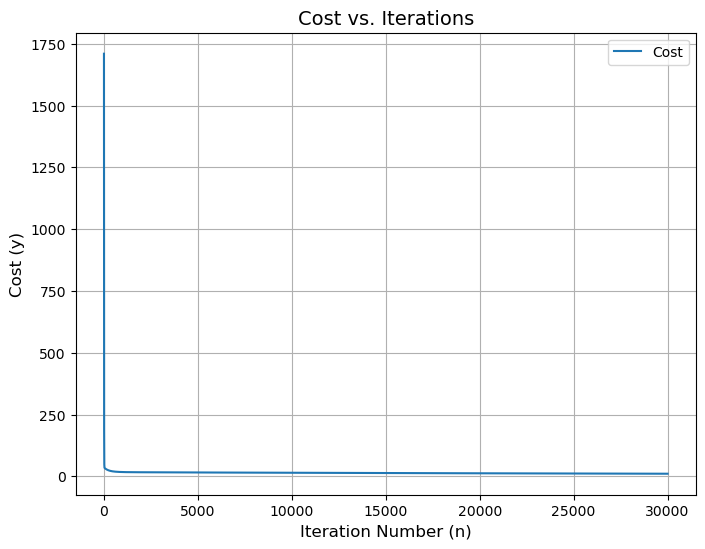

In [32]:
import matplotlib.pyplot as plt
n = list(range(1, len(cost_list) + 1))
plt.figure(figsize=(8, 6))
plt.plot(n, cost_list, label='Cost')
plt.xlabel('Iteration Number (n)', fontsize=12)
plt.ylabel('Cost (y)', fontsize=12)
plt.title('Cost vs. Iterations', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [18]:
a= np.linalg.inv(np.dot(x.T,x))
b=np.dot(a,np.dot(x.T,y))

In [19]:
b

array([[-34.07558809191284],
       [2.8529820535325974],
       [1.0184341923340519],
       [0.48055975471185297],
       [0.1938021400699108],
       [0.6128975819601123]], dtype=object)

In [39]:
theta

array([[-8.296221352305492],
       [2.3567508414937643],
       [0.8670303452180608],
       [-1.0265291606120799],
       [-0.15281593323279308],
       [-0.7970600593983056]], dtype=object)

In [40]:
m=y.size
y_pred=np.dot(x,b)
cost= (1/(2*m))*(np.sum(np.square(y-y_pred)))
cost

2.07567531697301

In [41]:
m=y.size
y_pred=np.dot(x,theta)
cost= (1/(2*m))*(np.sum(np.square(y-y_pred)))
cost

10.614773560713669

In [43]:
sse = np.sum(np.square(y-y_pred))
sse

212295.47121427336

In [44]:
mse = (1/m)*sse
mse

21.229547121427338

In [45]:
rmse = np.sqrt(mse)
rmse

4.607553268430799